In [23]:
# Ankita Priya 
# BTECH/60036/18

# Question2: Visualize the support vector classifier with the help of a plot in Python.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


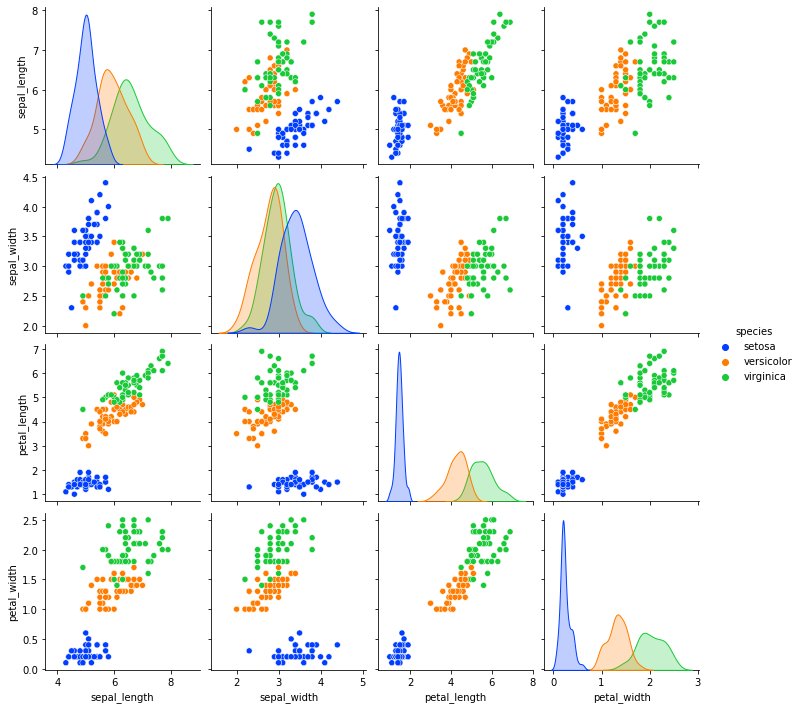

In [24]:
# import the library required 

import seaborn as sns

# load the dataset

iris = sns.load_dataset("iris")

# display the dataset

print(iris.head())

y = iris.species
X = iris.drop('species',axis=1)

# plot the data 

sns.pairplot(iris, hue="species",palette="bright")

In [25]:
# visualising data 

df=iris[(iris['species']!='virginica')]
df=df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


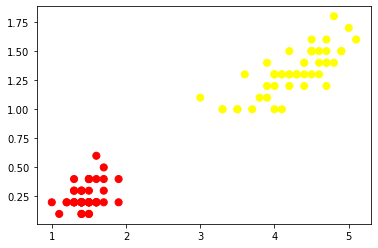

In [26]:
#let's convert categorical values to numerical target

import matplotlib.pyplot as plt
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
X=df.iloc[:,0:2]
y=df['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

In [27]:
# import the required library 

from sklearn.svm import SVC 

# train the algorithm

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [28]:
# visualising the coordinates of our supoort vector 

model.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

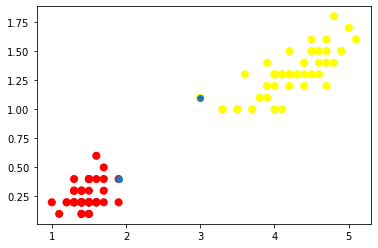

In [29]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

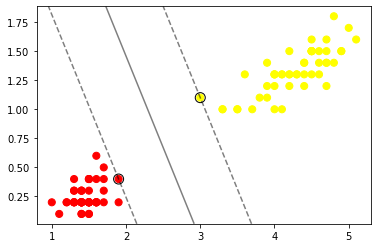

In [30]:
# import the required library 
import numpy as np 

# visualising the elements of our algorithm 
ax = plt.gca()

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Our algorithm found those coefficients for our hyperplane which maximize the margin.

 These points define a very interesting property of SVM optimization problem: only a few points actually end up in the final solution for creating the vector of parameters w which will define the best hyperplane. Hence, every point that is not a support vector can be moved anytime you want, yet it will not affect our decision boundary parameters.

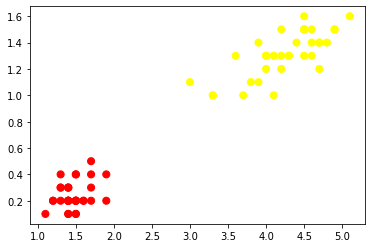

In [31]:
# reduce the size of sample without removing support vectors 

red_sample=df.sample(frac=0.7)
X=red_sample.iloc[:,0:2]
y=red_sample['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

Now, if we train again our SVM here, knowing that the two support vectors are still there, we will obtain exactly the same hyperplane!

That’s because, again, only data which are support vectors end up building the best hyperplane.

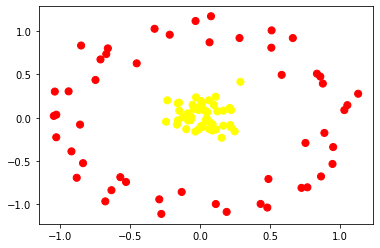

In [32]:
# No-Linearly-Separable Data

from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In the above code, the generated dataset of no-linearly separable was done manually. 

Result: data cannot be segregated by a straight line. 

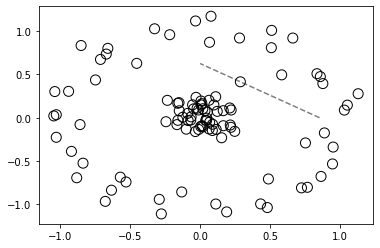

In [33]:
model=SVC(kernel='linear').fit(X, y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


Here,  if we were able to move from a 2D to a 3D task, we would be able to lift all the "centre" points and then use a plan to segregate the two clouds of points:

Text(0.5, 0, 'r')

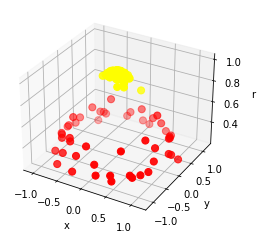

In [34]:
from mpl_toolkits import mplot3d

#setting the 3rd dimension with RBF centered on the middle clump

r = np.exp(-(X ** 2).sum(1))

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')